###Juan Camilo Serrano Correa 
###Rafael Fernando Leal Ramirez

Universidad Pedagógica y Tecnológica de Colombia
---
Proyecto electiva computacional
---
Pronostico del precio del EUR/USD


###Libraries

In [48]:
#Sistema
import sys 
import os
#Data Sciencie
import pandas as pd
#numerico
import numpy as np
#graficas
import matplotlib.pyplot as plt
import seaborn as sns # estilos de plt
#ML
#import tensorflow as tf
import keras 
import sklearn 
#from sklearn.model_selection import train_test_split
!pip install mplfinance #Instala la biblioteca mpl finance
import mplfinance as mpf #biblioteca para realizar graficas espcializadas en analisis tecnico
! pip install pmdarima #Instala la biblioteca pmdarima
from pmdarima.arima import auto_arima

###Procesamiento de datos

In [49]:
#importar dataset
dataset = pd.read_csv("/content/EURUSD=X_yahoo.csv",index_col="Date",parse_dates=True)#lee el data set CSV
data_predictc = pd.read_csv("/content/EURUSD=X_Predicted.csv",index_col="Date",parse_dates=True)#Dataset levemente modificado
#Para la predeccion, no se tienen datos testing ya que estos aun no existen, entonces se dejan los datos a prededicr constantes
dataset.head()    #Un vistaso a los datos

,Open,High,Low,Close,Adj Close,Volume;;;;;;;;;
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0;;;;;;;;;
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0;;;;;;;;;
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0;;;;;;;;;
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0;;;;;;;;;
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0;;;;;;;;;


In [50]:
dataset.shape

(4659, 6)

In [51]:
#Revisar si hay valores no numericos
dataset.isnull().sum()
data_predictc.isnull().sum()

#49 filas con valores extraños que tienen que ser eliminados 

Open         49
High         49
Low          49
Close        49
Adj Close    49
Volume       49
dtype: int64

In [52]:
dataset=dataset.dropna(how='any',axis=0)#Eliminar filas defectuosas
data_predictc=data_predictc.dropna(how='any',axis=0)
dataset.isnull().sum()#verificamos

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume;;;;;;;;;    0
dtype: int64

In [53]:
# Reduccion de dimensionalidad
#Adj close, es el valor de esa acción después de contabilizar cualquier acción corporativa.
del data_predictc["Adj Close"]
del data_predictc["Volume"]

del dataset["Adj Close"]  #Solo se trabaja con Close ya que este es la variable que contiene el precio de cierre en la bolsa
del dataset["Volume;;;;;;;;;"]       #Los datos de volumen no estan disponibles
dataset.shape 

(4610, 4)

In [54]:
dataset.head() 

,Open,High,Low,Close
Date,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501
2003-12-02,1.196101,1.210903,1.194600,1.208897
2003-12-03,1.209000,1.213003,1.207700,1.212298
2003-12-04,1.212004,1.214403,1.204398,1.208094
2003-12-05,1.207802,1.219096,1.206593,1.218695


In [55]:
dataset.to_csv("EURUSD.csv", index=False)#Guardamos el dataset

In [56]:
#El orden de las columnas tiene que ser de la siguiente forma
#Date Open	Close	High	Low
data_predictc = data_predictc[['Open', 'Close', 'High', 'Low']]#La biblioteca mplfinance toma los datos en este orden
dataset = dataset[['Open', 'Close', 'High', 'Low']]#La biblioteca mplfinance toma los datos en este orden

dataset.head()#Comprobar orden de columnas


,Open,Close,High,Low
Date,,,,
2003-12-01,1.203398,1.196501,1.204007,1.194401
2003-12-02,1.196101,1.208897,1.210903,1.194600
2003-12-03,1.209000,1.212298,1.213003,1.207700
2003-12-04,1.212004,1.208094,1.214403,1.204398
2003-12-05,1.207802,1.218695,1.219096,1.206593


In [57]:
print(dataset.describe())

              Open        Close         High          Low
count  4610.000000  4610.000000  4610.000000  4610.000000
mean      1.257627     1.257653     1.262359     1.252445
std       0.118898     0.118888     0.119635     0.119511
min       1.039393     1.039047     1.041992     0.072902
25%       1.162831     1.162906     1.165715     1.158430
50%       1.251440     1.251612     1.257229     1.246037
75%       1.341522     1.341108     1.345777     1.336112
max       1.598184     1.598798     1.602821     1.587402


*Prueba de estacionariedad*
Para el modelo Arima se requiere que los datos sean estacionarios.
Si no lo son se realiza una diferenciacion entre los datos, 
Si son estacionarions no se hace nada.

(0.24531572387630424, True)


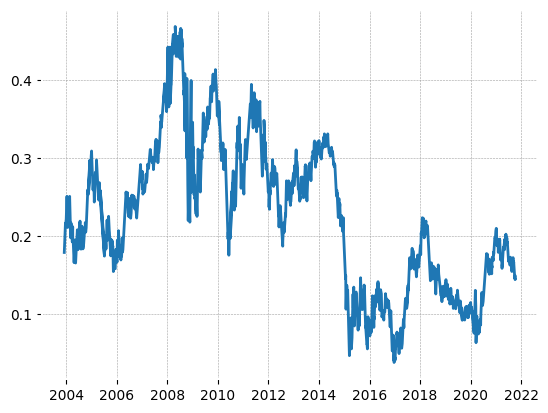

In [58]:
from pmdarima.arima import ADFTest 
closes_ADF = dataset["Close"]
adf_test = ADFTest(alpha = 0.05)   
print(adf_test.should_diff(closes_ADF)) #La serie temporal no es estacionaria
#Reducimos la velocidad con la que aumentan los cambios en la serie
df_log = np.log (closes_ADF) 
plt.plot (df_log)

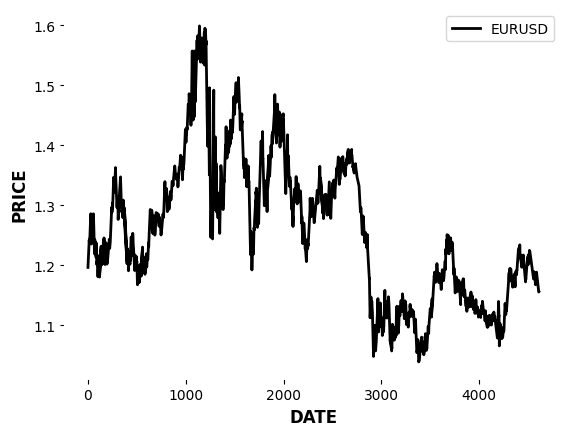

In [59]:
#En el analisis tecnico que se realiza para entender el comportamiento que esta teniendo un activo
#Es poco frecuente que se recura a un grafico  lineal de los precios de cierre.
#Es mas utilizado el grafico de velas japonesas ya que estas incluyen las 4 variables que son el precio de
#apertura, cierre, maximo y minimo

closes_predicted = data_predictc["Close"]#Se dividen todas las variables, para su respectiva prediccion
opens_predicted = data_predictc["Open"]
lowes_predicted = data_predictc["Low"]
highs_predicted = data_predictc["High"]

closes = dataset["Close"]

candle = np.array(dataset["Close"])

plt.plot(candle, color = 'black', label = 'EURUSD')#Grafico de linea del EURUSD
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.legend()
plt.grid()

Text(0, 0.5, 'PRICE')

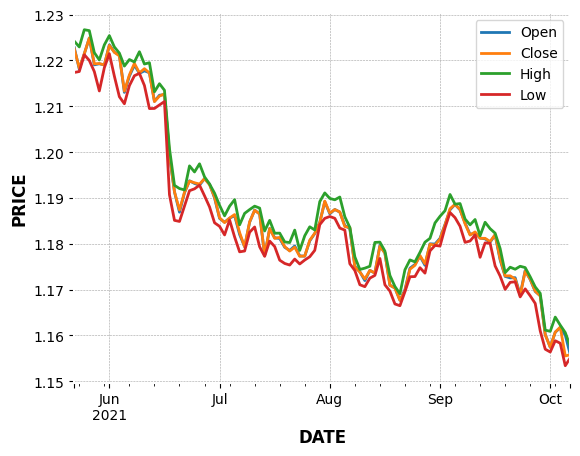

In [60]:
#Si se graficaran los 4 precios de forma convencional, se obtiene una grafica que no aporta mucha informacion adicional
dataset.tail(100).plot()
plt.xlabel('DATE')
plt.ylabel('PRICE')

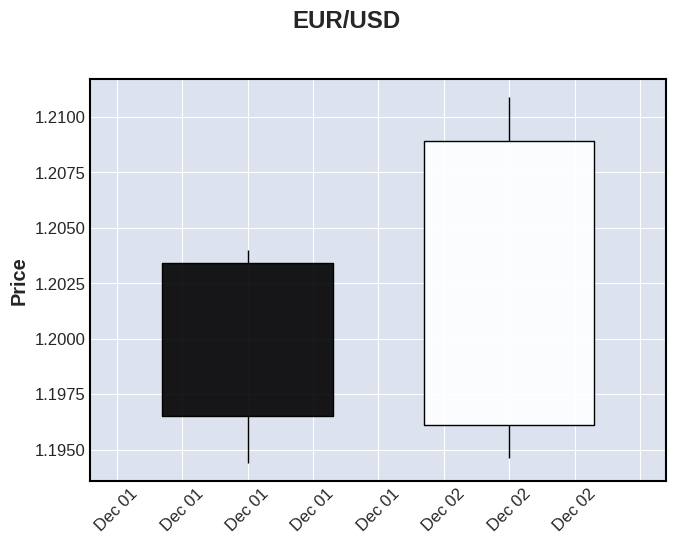

In [61]:
#La mecha que se observa en la parte superior de la vela es el maximo valor que alcanzo el activo en ese dia
#La mecha que es observa en la parte inferior de la vela es el minimo valor que alcanzo el activo en ese dia
#La parte superior e inferior del rectangulo, representan los precios de apertura y cierre del mercado
#Si la vela es de color negro, quiere decir que, el precio de apertura fue inferior al precio de cierre
#Si la vela es de color blanco, quiere decir que el precio de cierre fue inferior al precio de apertura
Candle1 = dataset.head(2)
mpf.plot(Candle1, type = 'candle', title = 'EUR/USD')
#Acontinuacion se muestra un ejemplo se los dos posibles casos

Los graficos de velas japonesas son muy utilizados en el analisis del precio de un activo. Ya que dependiendo de la forma de la vela y el patron que forme con otras velas, expone informacion adicional. Por esto aqui tambien se espone esta informacion en grafico de velas japonesas.
Una sola vela puede resumir el comportamiento que tuvo el precio en toda una session.


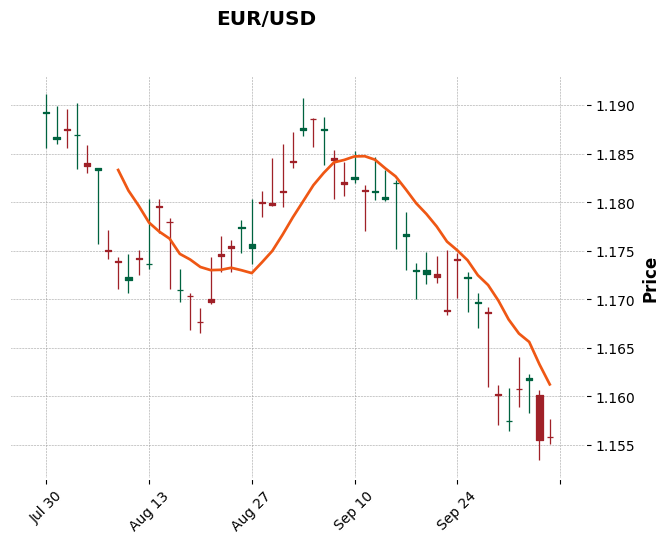

In [62]:
dataset_candle= dataset.tail(50)#Los datos estan alrevez, pero no importa
#Graficamos los ultimos datos para comprobar que es el mismo grafico de EUR/USD
#Graficar mas de 100 datos degrada la visibilidad 
#dataset.index.name = 'Date'
mpf.plot(dataset_candle, type = 'candle', style='charles', title = 'EUR/USD',mav=8)
#(Datos, tipo de grafico, titulo, media movil de 8 periodos)

###Spliting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


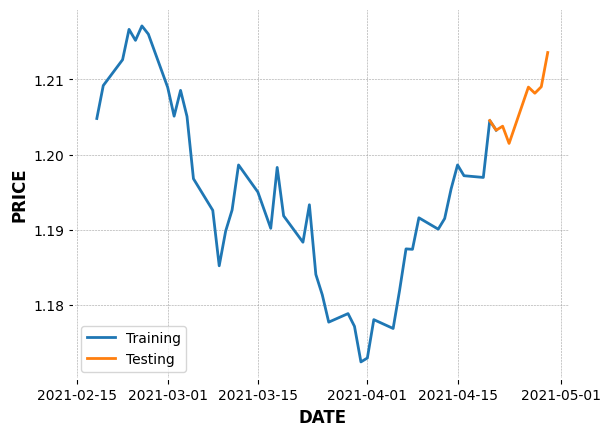

In [63]:
train =closes[4444:4489]   
test = closes[4487:4495] 
plt.plot(train,label="Training") 
plt.plot(test,label="Testing")
plt.xlabel('DATE')
plt.ylabel('PRICE')
plt.legend(loc = 'Left corner')
plt.show()

In [64]:
arima_model = auto_arima(train,     #Matris iterable 
                         d=1,       #El orden del término AR, diferenciar para hacerlo estacionario
                         start_q=1, # el orden del modelo de media móvil 
                         max_p=5,max_d=5,max_q=5,
                         start_p=1,D=1,start_Q=0,
                         max_P=5,max_D=5,max_Q=5,
                         m=12, #El período de diferenciación estacional, 4 para datos trimestrales
                         seasonal=True,  # adaptarse a un ARIMA de temporada
                         arror_action='warn',trace=True,
                         supress_warnings=False,
                         stepwise=True,
                         random_state=20,
                         n_fits=20)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-227.602, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-226.195, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-229.753, Time=0.73 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-229.625, Time=0.65 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-225.860, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-228.027, Time=1.90 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-227.895, Time=0.86 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-229.348, Time=0.24 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-226.071, Time=2.46 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-231.862, Time=0.47 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-229.961, Time=0.82 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-230.101, Time=0.35 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-231.898, Time=0.55 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-230.063, Time=0.74 sec
 ARIMA(0,1,0)(1,1,2

In [65]:
prediction = pd.DataFrame(arima_model.predict(n_periods=8),index=test.index)#test.index
#prediction.columns =['predicted_sales']
prediction
#ñ1_ kml =niup,ñ1_?¡

,0
Date,
2021-04-20,1.204104
2021-04-21,1.204049
2021-04-22,1.203191
2021-04-23,1.200549
2021-04-26,1.198619
2021-04-27,1.199835
2021-04-28,1.202827
2021-04-29,1.204439


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


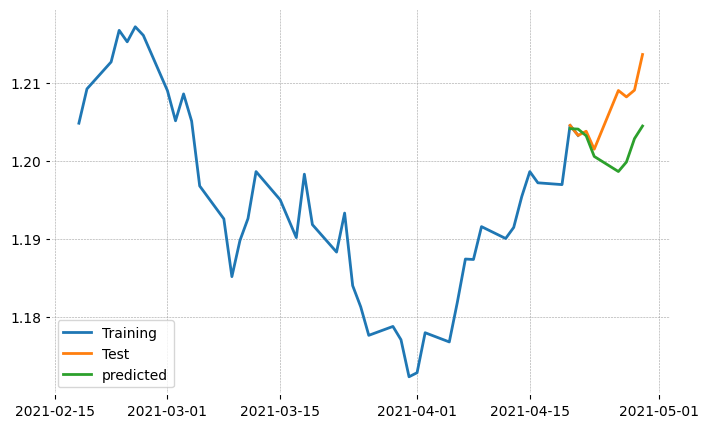

In [66]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
#plt.ylabel('PRICE')
plt.plot(prediction,label="predicted")
plt.legend(loc = 'Left corner')
plt.show()

METRICS

In [67]:
prediction=np.asarray(prediction)
test=np.asarray(test)

from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_error
from math import sqrt
mae = (mean_absolute_error(test, prediction))*100
mse = (mean_squared_error (test, prediction))
rmse = sqrt(mse)
print('MAE: %f' % mae,"%")
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)


MAE: 0.459996 %
MSE: 0.000038
RMSE: 0.006136


###Ahora usamos el modelo

In [68]:
#Spliting de todas las variables a predecir
closes_predicted.shape

(4620,)

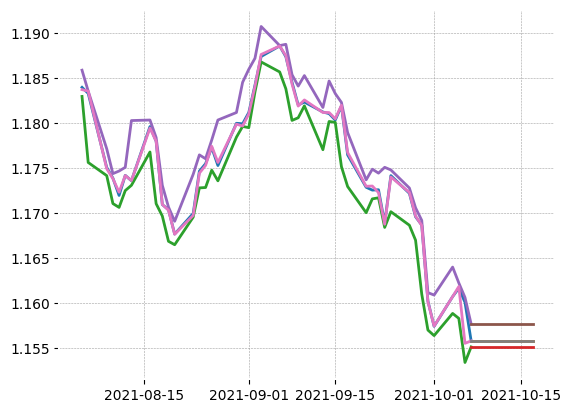

In [69]:
trainC_predicted =closes_predicted[4564:4610]   
testC_ = closes_predicted[4609:4620] 
#-------------------------------------------#
trainO_predicted =opens_predicted[4564:4610]   
testO_ = opens_predicted[4609:4620] 
#-------------------------------------------#
trainL_predicted =lowes_predicted[4564:4610]   
testL_ = lowes_predicted[4609:4620] 
#-------------------------------------------#
trainH_predicted =highs_predicted[4564:4610]   
testH_ = highs_predicted[4609:4620] 
#-------------------------------------------#

plt.plot(trainO_predicted) 
plt.plot(testO_)
plt.plot(trainL_predicted) 
plt.plot(testL_)
plt.plot(trainH_predicted) 
plt.plot(testH_)
plt.plot(trainC_predicted) 
plt.plot(testC_)

In [ ]:
arima_model_predictedC = auto_arima(trainC_predicted,     #Matris iterable 
                         d=1,       #El orden del término AR, diferenciar para hacerlo estacionario
                         start_q=1, # el orden del modelo de media móvil 
                         max_p=5,max_d=5,max_q=5,
                         start_p=1,D=1,start_Q=0,
                         max_P=5,max_D=5,max_Q=5,
                         m=12, #El período de diferenciación estacional, 4 para datos trimestrales
                         seasonal=True,  # adaptarse a un ARIMA de temporada
                         arror_action='warn',trace=True,
                         supress_warnings=False,
                         stepwise=True,
                         random_state=20,
                         n_fits=50)
arima_model_predictedO = auto_arima(trainO_predicted,     #Matris iterable 
                         d=1,       #El orden del término AR, diferenciar para hacerlo estacionario
                         start_q=1, # el orden del modelo de media móvil 
                         max_p=5,max_d=5,max_q=5,
                         start_p=1,D=1,start_Q=0,
                         max_P=5,max_D=5,max_Q=5,
                         m=12, #El período de diferenciación estacional, 4 para datos trimestrales
                         seasonal=True,  # adaptarse a un ARIMA de temporada
                         arror_action='warn',trace=True,
                         supress_warnings=False,
                         stepwise=True,
                         random_state=20,
                         n_fits=50)
arima_model_predictedL = auto_arima(trainL_predicted,     #Matris iterable 
                         d=1,       #El orden del término AR, diferenciar para hacerlo estacionario
                         start_q=1, # el orden del modelo de media móvil 
                         max_p=5,max_d=5,max_q=5,
                         start_p=1,D=1,start_Q=0,
                         max_P=5,max_D=5,max_Q=5,
                         m=12, #El período de diferenciación estacional, 4 para datos trimestrales
                         seasonal=True,  # adaptarse a un ARIMA de temporada
                         arror_action='warn',trace=True,
                         supress_warnings=False,
                         stepwise=True,
                         random_state=20,
                         n_fits=50)
arima_model_predictedH = auto_arima(trainH_predicted,     #Matris iterable 
                         d=1,       #El orden del término AR, diferenciar para hacerlo estacionario
                         start_q=1, # el orden del modelo de media móvil 
                         max_p=5,max_d=5,max_q=5,
                         start_p=1,D=1,start_Q=0,
                         max_P=5,max_D=5,max_Q=5,
                         m=12, #El período de diferenciación estacional, 4 para datos trimestrales
                         seasonal=True,  # adaptarse a un ARIMA de temporada
                         arror_action='warn',trace=True,
                         supress_warnings=False,
                         stepwise=True,
                         random_state=20,
                         n_fits=50)

In [44]:
predictionC = pd.DataFrame(arima_model_predictedC.predict(n_periods=11),index=testC_.index)
#predictionC.columns =['predicted_sales']

predictionO = pd.DataFrame(arima_model_predictedO.predict(n_periods=11),index=testO_.index)
#predictionO.columns =['predicted_sales']

predictionL = pd.DataFrame(arima_model_predictedL.predict(n_periods=11),index=testL_.index)
#predictionL.columns =['predicted_sales']

predictionH = pd.DataFrame(arima_model_predictedH.predict(n_periods=11),index=testH_.index)
#predictionH.columns =['predicted_sales']

In [ ]:

#AllData = [predictionO,predictionC,predictionH,predictionL]
#AllData
#Date Open	Close	High	Low
#mpf.plot(AllData, type = 'candle', title = 'EUR/USD')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


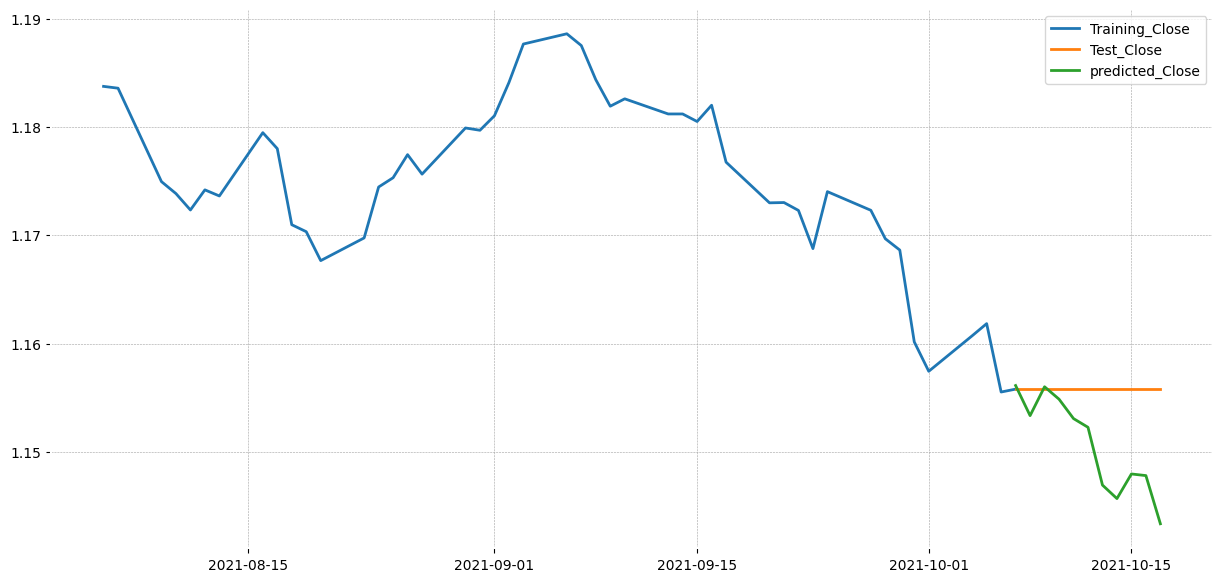

<Figure size 640x480 with 0 Axes>

In [46]:
#Grafica del pronostico de la precio de cierre
#Primero probamos esta grafica ya que fue con la que entrenamos el 
#Modelo
plt.figure(figsize=(15,7))

plt.plot(trainC_predicted,label="Training_Close")
plt.plot(testC_,label="Test_Close")
plt.plot(predictionC,label="predicted_Close")
plt.legend(loc = 'Left corner')
plt.show()
plt.savefig('evidence_07_10_2021.png')#Aqui guardamos la evidencia para despues coroborar si la prediccion fue correcta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Unrecognized location 'Left corner'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


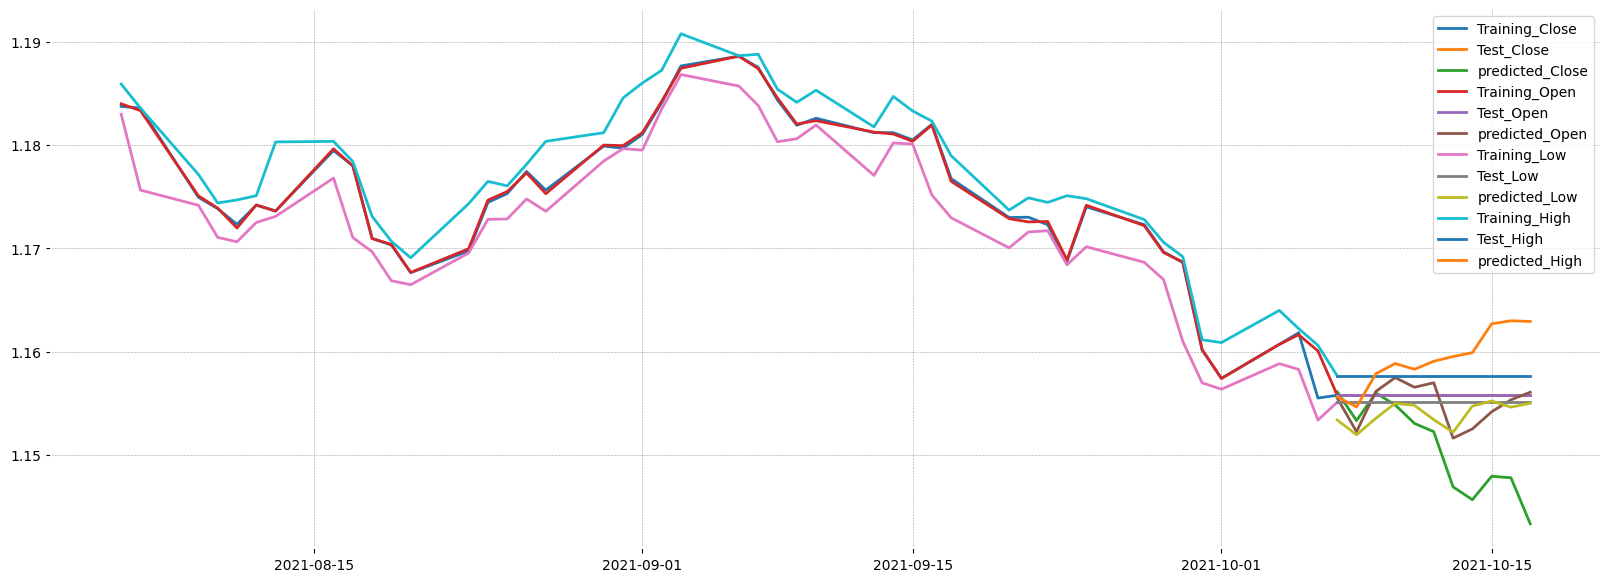

In [47]:
#Grafica del pronostico de todas las variables 
plt.figure(figsize=(20,7))

plt.plot(trainC_predicted,label="Training_Close")
plt.plot(testC_,label="Test_Close")
plt.plot(predictionC,label="predicted_Close")

plt.plot(trainO_predicted,label="Training_Open")
plt.plot(testO_,label="Test_Open")
plt.plot(predictionO,label="predicted_Open")

plt.plot(trainL_predicted,label="Training_Low")
plt.plot(testL_,label="Test_Low")
plt.plot(predictionL,label="predicted_Low")

plt.plot(trainH_predicted,label="Training_High")
plt.plot(testH_,label="Test_High")
plt.plot(predictionH,label="predicted_High")

plt.legend(loc = 'Left corner')
plt.show()


Al Observar la grafica generada, observamos que las demas variables no tienen un comportamiento coherente, ya que todas las variables siempre tienen que ir acorde con las demas variables.
El precio Low, (PredictedL) siempre tiene que ser el valor mas bajo, de igual modo precio High (PredictedH) Sieempre tiene que ubicarse como el precio mal alto.
Porlo que se puede concluir que las demas variables no se pueden entrenar con el mismo modelo que los precios de cierre.